<a href="https://colab.research.google.com/github/Srikanthr7/Cardio-and-diabetes/blob/main/Cardio_and_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Model for diabetes and vascularcardio disease

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
cardio_data = pd.read_csv('/content/cardio_train.csv', delimiter=';')
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Preprocessing Cardiovascular Dataset
cardio_data['Age'] = (cardio_data['age'] // 365).astype(int)  # Convert age from days to years
X_cardio = cardio_data.drop(columns=['id', 'age', 'cardio'])
y_cardio = cardio_data['cardio']

# Preprocessing Diabetes Dataset
X_diabetes = diabetes_data.drop(columns=['Outcome'])
y_diabetes = diabetes_data['Outcome']

# Train-test split for both datasets
X_train_cardio, X_test_cardio, y_train_cardio, y_test_cardio = train_test_split(
    X_cardio, y_cardio, test_size=0.2, random_state=42
)

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Train Random Forest models for both tasks
rf_cardio = RandomForestClassifier(random_state=42)
rf_cardio.fit(X_train_cardio, y_train_cardio)

rf_diabetes = RandomForestClassifier(random_state=42)
rf_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Generate Predictions for Both Models
y_pred_cardio = rf_cardio.predict(X_test_cardio)
y_pred_diabetes = rf_diabetes.predict(X_test_diabetes)

# Save Predictions and Actuals to CSV for Cardiovascular Model
cardio_predictions = pd.DataFrame({
    'Actual': y_test_cardio,
    'Predicted': y_pred_cardio
})
cardio_predictions.to_csv('cardio_predictions.csv', index=False)

# Save Predictions and Actuals to CSV for Diabetes Model
diabetes_predictions = pd.DataFrame({
    'Actual': y_test_diabetes,
    'Predicted': y_pred_diabetes
})
diabetes_predictions.to_csv('diabetes_predictions.csv', index=False)

# Print confirmation
print("Prediction CSV files have been saved:")
print("1. cardio_predictions.csv")
print("2. diabetes_predictions.csv")

# Print Reports
print("\nCardiovascular Disease Prediction Report:")
print("Accuracy:", accuracy_score(y_test_cardio, y_pred_cardio))
print(classification_report(y_test_cardio, y_pred_cardio))

print("\nDiabetes Prediction Report:")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print(classification_report(y_test_diabetes, y_pred_diabetes))


Prediction CSV files have been saved:
1. cardio_predictions.csv
2. diabetes_predictions.csv

Cardiovascular Disease Prediction Report:
Accuracy: 0.7055714285714285
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6988
           1       0.71      0.70      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


Diabetes Prediction Report:
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Visualization

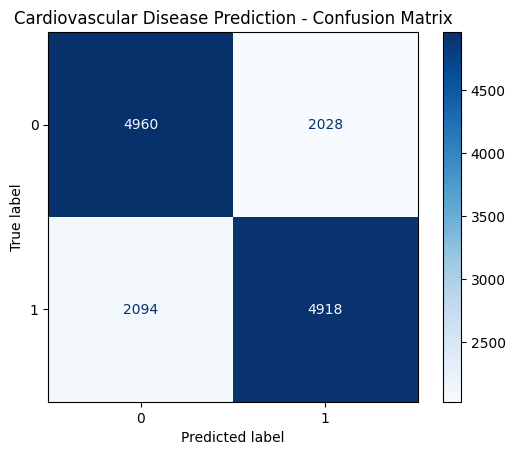

Cardiovascular Disease Prediction - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6988
           1       0.71      0.70      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



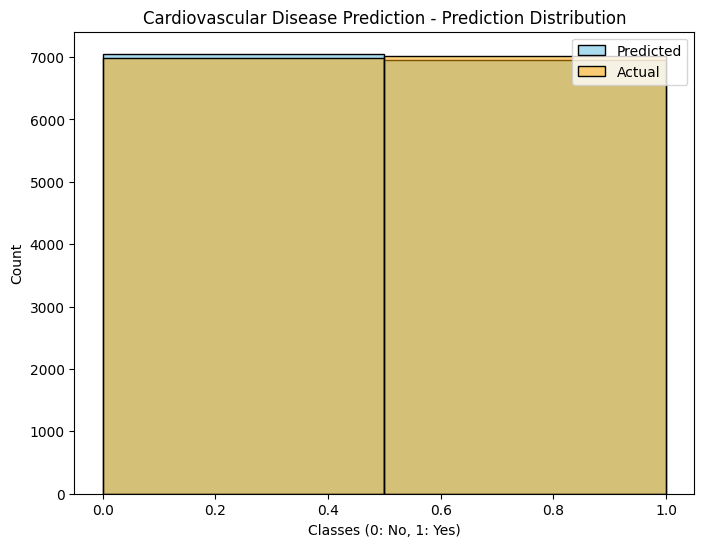

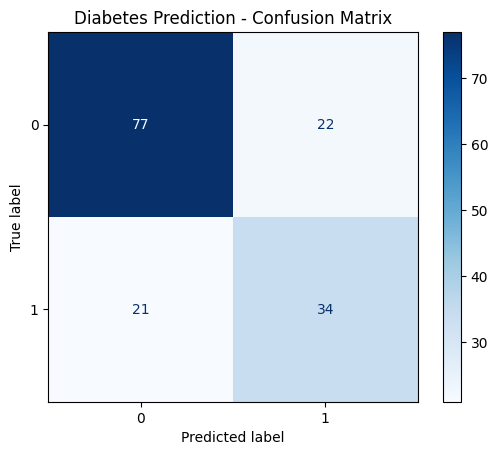

Diabetes Prediction - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



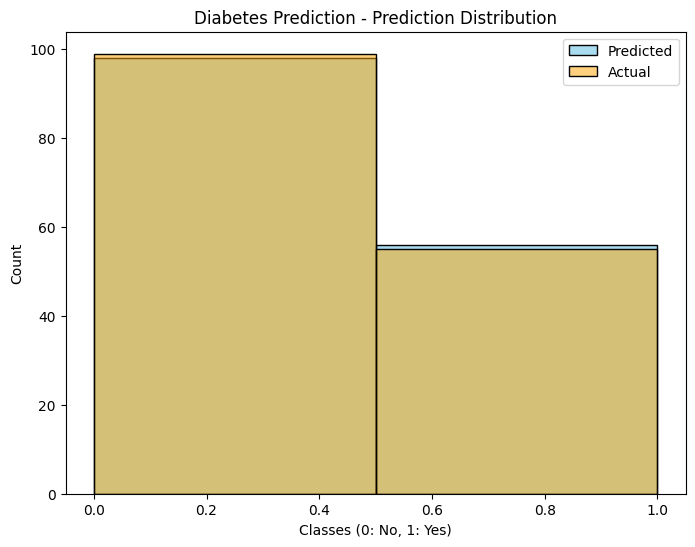

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load prediction files
cardio_predictions = pd.read_csv('cardio_predictions.csv')
diabetes_predictions = pd.read_csv('diabetes_predictions.csv')

# Visualization Function
def visualize_predictions(predictions, title):
    # Confusion Matrix
    cm = confusion_matrix(predictions['Actual'], predictions['Predicted'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

    # Classification Report
    print(f"{title} - Classification Report:")
    print(classification_report(predictions['Actual'], predictions['Predicted']))

    # Distribution of Predictions
    plt.figure(figsize=(8, 6))
    sns.histplot(predictions['Predicted'], bins=2, kde=False, color='skyblue', alpha=0.7, label='Predicted')
    sns.histplot(predictions['Actual'], bins=2, kde=False, color='orange', alpha=0.5, label='Actual')
    plt.title(f"{title} - Prediction Distribution")
    plt.xlabel("Classes (0: No, 1: Yes)")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

# Visualize Cardiovascular Predictions
visualize_predictions(cardio_predictions, "Cardiovascular Disease Prediction")

# Visualize Diabetes Predictions
visualize_predictions(diabetes_predictions, "Diabetes Prediction")


In [ ]:
Stream lit

In [4]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


Stream lit app

In [5]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the pre-trained models
rf_cardio = RandomForestClassifier(random_state=42)
rf_diabetes = RandomForestClassifier(random_state=42)

# Load the datasets for training
cardio_data = pd.read_csv('cardio_train.csv', delimiter=';')
diabetes_data = pd.read_csv('diabetes.csv')

# Preprocessing Cardiovascular Dataset
cardio_data['Age'] = (cardio_data['age'] // 365).astype(int)  # Convert age from days to years
X_cardio = cardio_data.drop(columns=['id', 'age', 'cardio'])
y_cardio = cardio_data['cardio']

# Preprocessing Diabetes Dataset
X_diabetes = diabetes_data.drop(columns=['Outcome'])
y_diabetes = diabetes_data['Outcome']

# Train the models (or load pre-trained models if saved)
rf_cardio.fit(X_cardio, y_cardio)
rf_diabetes.fit(X_diabetes, y_diabetes)

# Streamlit UI
st.title("Cardiovascular and Diabetes Prediction App")

# Input form for cardiovascular disease prediction
st.header("Cardiovascular Disease Prediction")
age = st.number_input("Age (years):", min_value=1, max_value=120)
gender = st.selectbox("Gender:", ["Male", "Female"])
height = st.number_input("Height (cm):")
weight = st.number_input("Weight (kg):")
systolic_bp = st.number_input("Systolic Blood Pressure (mmHg):")
diastolic_bp = st.number_input("Diastolic Blood Pressure (mmHg):")

# Convert gender into a numerical format (male = 1, female = 2, as an example)
gender = 1 if gender == "Male" else 2

cardio_input = pd.DataFrame({
    'Age': [age],
    'gender': [gender],
    'height': [height],
    'weight': [weight],
    'ap_hi': [systolic_bp],
    'ap_lo': [diastolic_bp],
    # Include other features you might have in the dataset
})

if st.button("Predict Cardiovascular Disease"):
    cardio_prediction = rf_cardio.predict(cardio_input)
    st.write("Prediction Result: Cardiovascular Disease" if cardio_prediction[0] == 1 else "No Cardiovascular Disease")

# Input form for diabetes prediction
st.header("Diabetes Prediction")
glucose = st.number_input("Glucose Level:")
blood_pressure = st.number_input("Blood Pressure:")
skin_thickness = st.number_input("Skin Thickness (mm):")
insulin = st.number_input("Insulin Level:")
bmi = st.number_input("BMI:")
diabetes_pedigree_function = st.number_input("Diabetes Pedigree Function:")
age_diabetes = st.number_input("Age (years):")

diabetes_input = pd.DataFrame({
    'Pregnancies': [0],  # Example default value, replace with actual features from your dataset
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age_diabetes]
})

if st.button("Predict Diabetes"):
    diabetes_prediction = rf_diabetes.predict(diabetes_input)
    st.write("Prediction Result: Diabetes" if diabetes_prediction[0] == 1 else "No Diabetes")



2025-01-20 09:01:06.191 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.413 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-20 09:01:06.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-20 09:01:06.429 Thread 'MainThread': mi

In [8]:
!streamlit run your_script.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: your_script.py


In [9]:
pip install streamlit


In [10]:
# Install streamlit
!pip install streamlit

# Create a simple Streamlit app
%%writefile app.py
import streamlit as st

st.title('Hello from Streamlit!')
st.write('This is a basic Streamlit app running in Colab!')

# Run the Streamlit app
!streamlit run app.py &

# Get the URL to access the Streamlit app
!npx localtunnel --port 8501


UsageError: Line magic function `%%writefile` not found.


In [11]:
# Saving the Streamlit app code as 'app.py'
app_code = """
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the pre-trained models
rf_cardio = RandomForestClassifier(random_state=42)
rf_cardio.load("rf_cardio_model.pkl")

rf_diabetes = RandomForestClassifier(random_state=42)
rf_diabetes.load("rf_diabetes_model.pkl")

# Function to make prediction for cardiovascular disease
def predict_cardio(features):
    return rf_cardio.predict([features])

# Function to make prediction for diabetes
def predict_diabetes(features):
    return rf_diabetes.predict([features])

# Streamlit UI
st.title("Cardiovascular Disease and Diabetes Prediction")

# Create user input fields for the cardiovascular dataset
st.header("Cardiovascular Disease Prediction")
age = st.number_input("Age (years)", min_value=18, max_value=100)
gender = st.radio("Gender", ("Male", "Female"))
height = st.number_input("Height (cm)", min_value=100, max_value=250)
weight = st.number_input("Weight (kg)", min_value=30, max_value=200)
blood_pressure = st.number_input("Blood Pressure (mm Hg)", min_value=80, max_value=200)
cholesterol = st.number_input("Cholesterol level (mg/dL)", min_value=100, max_value=500)
glucose = st.number_input("Glucose level (mg/dL)", min_value=70, max_value=300)

# Create user input fields for the diabetes dataset
st.header("Diabetes Prediction")
pregnancies = st.number_input("Number of Pregnancies", min_value=0, max_value=20)
insulin = st.number_input("Insulin level", min_value=0, max_value=1000)
bmi = st.number_input("BMI", min_value=10.0, max_value=50.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5)

# Prediction button
if st.button("Make Predictions"):
    # Prepare the input features for prediction
    cardio_features = [age, gender, height, weight, blood_pressure, cholesterol, glucose]
    diabetes_features = [pregnancies, insulin, bmi, diabetes_pedigree]

    # Make predictions
    cardio_prediction = predict_cardio(cardio_features)
    diabetes_prediction = predict_diabetes(diabetes_features)

    # Display the results
    st.subheader("Cardiovascular Disease Prediction Result")
    st.write("Risk of Cardiovascular Disease: " + ("Yes" if cardio_prediction[0] == 1 else "No"))

    st.subheader("Diabetes Prediction Result")
    st.write("Risk of Diabetes: " + ("Yes" if diabetes_prediction[0] == 1 else "No"))
"""

# Write the content into 'app.py' file
with open("app.py", "w") as file:
    file.write(app_code)


In [12]:
!ls


app.py			cardio_train.csv  diabetes_predictions.csv
cardio_predictions.csv	diabetes.csv	  sample_data


In [13]:
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import joblib

# Save models to disk
joblib.dump(rf_cardio, "rf_cardio_model.pkl")
joblib.dump(rf_diabetes, "rf_diabetes_model.pkl")


['rf_diabetes_model.pkl']

In [15]:
!pip install streamlit
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [ ]:
!streamlit run app.py &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.241.128:8501



In [ ]:
!npx localtunnel --port 8501
